# Inicializar Doogle Drive para el acceso al dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/School/University/4th year/Desarrollo Aplicaciones/M2 Project/"
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1ID_1xoSIQPchHS49QasU7_ylqg2MFHhH/School/University/4th year/Desarrollo Aplicaciones/M2 Project
A01610836_M2_MachineLearning.ipynb  augmented  Dataset	Documentación.gdoc


# Importar librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
# Recibe información y produce información nueva
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Configuración del Image Data Generator

In [56]:
# Carga de imagenes
base_dir = "Dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Configuración del ImageDataGenerator para modificar las imágenes de train
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Escalado de la imagen
    rotation_range = 100,
    # width_shift_range = 0.4,
    # height_shift_range = 0.4,
    shear_range = 10,
    # fill_mode = "wrap",
    zoom_range = [0.3, 0.9],
    horizontal_flip = True,
)


# Generación de Imágenes modificadas del train dataset (Data augmentation)

Found 4113 images belonging to 11 classes.
(8, 150, 150, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

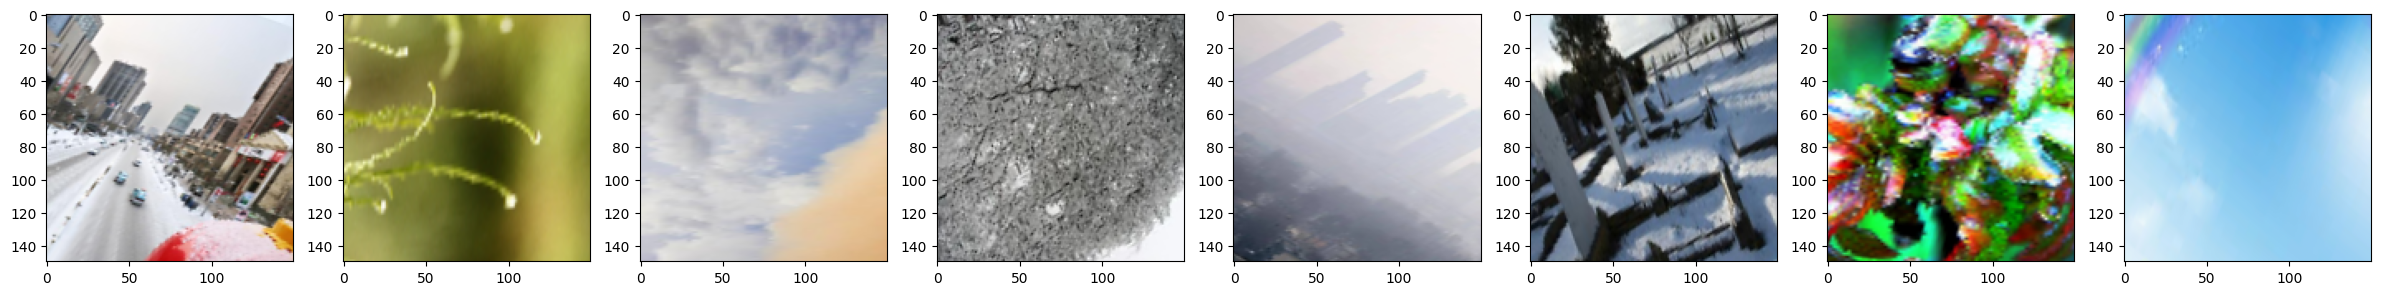

In [57]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = "categorical",
    # Guardar imágenes generadas
    # save_to_dir = "augmented",
    # save_prefix = "aug",
    # save_format = "jpg"
)

images, labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()

f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]):
  axarr[i].imshow(images[i])
